In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Define path
path = r'/Users/shikongo/Instacart Basket Analysis/'

In [3]:
path

'/Users/shikongo/Instacart Basket Analysis/'

In [4]:
df_customers_merged = pd.read_pickle(r'/Users/shikongo/Instacart Basket Analysis/02 Data/Prepared Data/order_product_customer_final_merge.pkl')

In [5]:
df_customers_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'order_product_customer_final_merge.pkl'))

In [6]:
df_customers_merged.head()

,user_id,First Name,Surname,Gender,STATE,Age,number_dependents,family_status,income,Unnamed: 0_x,...,reordered,_merge,price_range,price_range_loc,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending_flag,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,0,both,Not enough data,Mid-range product,Busiest days,Most_orders,8,New customer,Low spender,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,1,both,Not enough data,Mid-range product,Regular days,Most_orders,8,New customer,Low spender,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,1,both,Not enough data,Mid-range product,Busiest days,Most_orders,8,New customer,Low spender,Regular customer
3,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285.0,195,...,0,both,Not enough data,Mid-range product,Regular days,Most_orders,5,New customer,Low spender,Non-frequent customer
4,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285.0,195,...,1,both,Not enough data,Mid-range product,Busiest days,Average_orders,5,New customer,Low spender,Non-frequent customer


1. Security implications

In [7]:
# Address PII data_dropping columns (First Name and Surname) as these contain senstive information
df_customers_merged.drop(columns = ['First Name','Surname'])

,user_id,Gender,STATE,Age,number_dependents,family_status,income,Unnamed: 0_x,product_id,product_name,...,reordered,_merge,price_range,price_range_loc,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending_flag,frequency_flag
0,26711,Female,Missouri,48,3,married,165665.0,195,196,Soda,...,0,both,Not enough data,Mid-range product,Busiest days,Most_orders,8,New customer,Low spender,Regular customer
1,26711,Female,Missouri,48,3,married,165665.0,195,196,Soda,...,1,both,Not enough data,Mid-range product,Regular days,Most_orders,8,New customer,Low spender,Regular customer
2,26711,Female,Missouri,48,3,married,165665.0,195,196,Soda,...,1,both,Not enough data,Mid-range product,Busiest days,Most_orders,8,New customer,Low spender,Regular customer
3,33890,Female,New Mexico,36,0,single,59285.0,195,196,Soda,...,0,both,Not enough data,Mid-range product,Regular days,Most_orders,5,New customer,Low spender,Non-frequent customer
4,33890,Female,New Mexico,36,0,single,59285.0,195,196,Soda,...,1,both,Not enough data,Mid-range product,Busiest days,Average_orders,5,New customer,Low spender,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,49635,Male,Hawaii,62,3,married,168639.0,717,717,Sweeper Open Window Fresh Scent Wet Mopping Cl...,...,0,both,Not enough data,Mid-range product,Regular days,Most_orders,3,New customer,High spender,Frequent customer
999996,135902,Female,Missouri,66,2,married,53374.0,458,459,Honey Vanilla Greek Yogurt,...,0,both,Not enough data,Mid-range product,Regular days,Most_orders,8,New customer,Low spender,Frequent customer
999997,135902,Female,Missouri,66,2,married,53374.0,1700,1700,White Cheddar Popcorn,...,0,both,Not enough data,Mid-range product,Regular days,Average_orders,8,New customer,Low spender,Frequent customer
999998,135902,Female,Missouri,66,2,married,53374.0,1700,1700,White Cheddar Popcorn,...,1,both,Not enough data,Mid-range product,Regular days,Most_orders,8,New customer,Low spender,Frequent customer


2. Create Region column based on the State column from customers data set

In [8]:
# Create a Region Mapping: Add a "Region" column based on the "State" column
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Marlyland', 'District of Columbia', 'Virginia', 'West Virgina', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Define
def create_region_map(row):
    if row['STATE'] in Northeast:
        return 'Northeast'
    elif row['STATE'] in Midwest:
        return 'Midwest'
    elif row['STATE'] in South:
        return 'South'
    else:
        return 'West'

In [10]:
# Apply
df_customers_merged['region'] = df_customers_merged.apply(create_region_map, axis=1)

In [11]:
# Check the output
df_customers_merged.head()

,user_id,First Name,Surname,Gender,STATE,Age,number_dependents,family_status,income,Unnamed: 0_x,...,_merge,price_range,price_range_loc,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending_flag,frequency_flag,region
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,both,Not enough data,Mid-range product,Busiest days,Most_orders,8,New customer,Low spender,Regular customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,both,Not enough data,Mid-range product,Regular days,Most_orders,8,New customer,Low spender,Regular customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,both,Not enough data,Mid-range product,Busiest days,Most_orders,8,New customer,Low spender,Regular customer,Midwest
3,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285.0,195,...,both,Not enough data,Mid-range product,Regular days,Most_orders,5,New customer,Low spender,Non-frequent customer,West
4,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285.0,195,...,both,Not enough data,Mid-range product,Busiest days,Average_orders,5,New customer,Low spender,Non-frequent customer,West


In [12]:
# Cross the "Region" column with the "Spending Flag" column
df_customers_merged.groupby('region').agg({'prices': ['mean', 'median', 'max', 'min']})

prices                  
               mean median   max  min
region                               
Midwest    7.856072    8.2  24.5  1.0
Northeast  7.832938    8.2  24.5  1.0
South      7.837181    8.2  24.5  1.0
West       7.848795    8.2  24.5  1.0

3.Create an exclusion flag for low-activity customers (customers with less than 5 order

In [13]:
# Define
def create_exclusion_flag(row):
    if row['max_order'] < 5:
        return True
    else:
        return False

In [14]:
df_customers_merged['exclusion_flag'] = df_customers_merged.apply(create_exclusion_flag, axis=1)

In [15]:
df_customers_merged.head()

,user_id,First Name,Surname,Gender,STATE,Age,number_dependents,family_status,income,Unnamed: 0_x,...,price_range,price_range_loc,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending_flag,frequency_flag,region,exclusion_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,Not enough data,Mid-range product,Busiest days,Most_orders,8,New customer,Low spender,Regular customer,Midwest,False
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,Not enough data,Mid-range product,Regular days,Most_orders,8,New customer,Low spender,Regular customer,Midwest,False
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,Not enough data,Mid-range product,Busiest days,Most_orders,8,New customer,Low spender,Regular customer,Midwest,False
3,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285.0,195,...,Not enough data,Mid-range product,Regular days,Most_orders,5,New customer,Low spender,Non-frequent customer,West,False
4,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285.0,195,...,Not enough data,Mid-range product,Busiest days,Average_orders,5,New customer,Low spender,Non-frequent customer,West,False


In [16]:
df_customers_merged = df_customers_merged[df_customers_merged.exclusion_flag != True]

In [17]:
df_customers_merged.head()

,user_id,First Name,Surname,Gender,STATE,Age,number_dependents,family_status,income,Unnamed: 0_x,...,price_range,price_range_loc,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending_flag,frequency_flag,region,exclusion_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,Not enough data,Mid-range product,Busiest days,Most_orders,8,New customer,Low spender,Regular customer,Midwest,False
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,Not enough data,Mid-range product,Regular days,Most_orders,8,New customer,Low spender,Regular customer,Midwest,False
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,Not enough data,Mid-range product,Busiest days,Most_orders,8,New customer,Low spender,Regular customer,Midwest,False
3,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285.0,195,...,Not enough data,Mid-range product,Regular days,Most_orders,5,New customer,Low spender,Non-frequent customer,West,False
4,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285.0,195,...,Not enough data,Mid-range product,Busiest days,Average_orders,5,New customer,Low spender,Non-frequent customer,West,False


4. Export the sample without low-activity customers to a new CSV file

In [18]:
df_customers_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged_exclusion_flag.pkl'))

In [19]:
df_customers_merged.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'number_dependents', 'family_status', 'income', 'Unnamed: 0_x',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id', 'eval_set', 'order_number',
       'orders_day_of_wek', 'order_hour_of_day', 'days_since_prior_order',
       'ordr_id', 'add_to_cart_order', 'reordered', '_merge', 'price_range',
       'price_range_loc', 'Busiest_days', 'Busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spending_flag', 'frequency_flag', 'region',
       'exclusion_flag'],
      dtype='object')

5. Create customers profile

In [20]:
# Define a function to create customers profiles

def create_customers_profile(row): 
    
    if row['Age']<=30 and row['income']>=50000:
        return 'Young Professional'
    elif row['Age']<= 35 and row['number_dependents'] > 0:
        return 'Young parent'
    elif row['department_id'] in [2,8,12]:
        return 'Health Conscious'
    elif row['orders_day_of_wek']== 0 and row['order_hour_of_day']>= 18:
        return 'Sunday Evening Shopper'
    elif row['Age']>= 65:
        return 'elderly'
    elif row['income']<15000:
        return 'impoverished'
    elif row['Age']>35 and row['Age']<65:
        return 'Middle Aged'
    else:
        return 'other'


In [21]:
# Apply the create_customer_profile function to create the profiling variabel
df_customers_merged['customer_profile'] = df_customers_merged.apply(create_customers_profile, axis =1)


In [22]:
# Display the resutling dataframe with the customer profiles
print(df_customers_merged[['user_id','Age','income','number_dependents','department_id',
         'orders_day_of_wek','order_hour_of_day','customer_profile']],)

        user_id  Age    income  number_dependents  department_id  \
0         26711   48  165665.0                  3              7   
1         26711   48  165665.0                  3              7   
2         26711   48  165665.0                  3              7   
3         33890   36   59285.0                  0              7   
4         33890   36   59285.0                  0              7   
...         ...  ...       ...                ...            ...   
999993   122741   24   73357.0                  2             16   
999996   135902   66   53374.0                  2             16   
999997   135902   66   53374.0                  2             19   
999998   135902   66   53374.0                  2             19   
999999   135902   66   53374.0                  2             19   

        orders_day_of_wek  order_hour_of_day    customer_profile  
0                       1                  9         Middle Aged  
1                       5                 15     

6.Create an appropriate visualization to show the distribution of profiles.

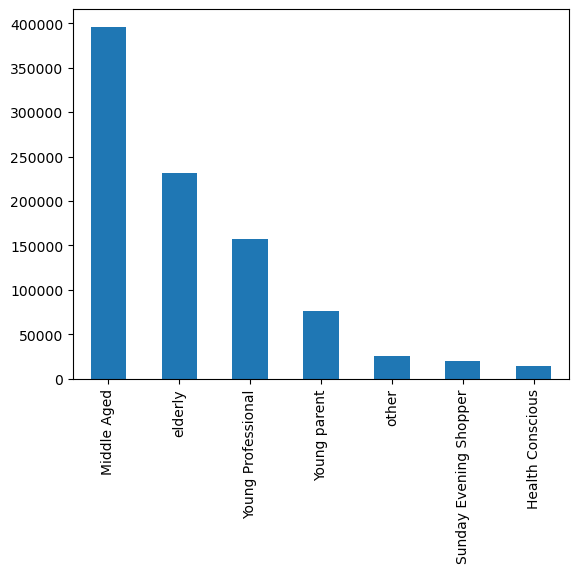

In [23]:
# Create a bar chart
bar = df_customers_merged['customer_profile'].value_counts().plot.bar()
fig = bar.get_figure()
fig.savefig(os.path.join(path, 'bar.png'))

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [24]:
# Group by 'customer_profile'and calculate max, mean, and min for 'usage_frequency' and 'expenditure'
profile_aggregated = df_customers_merged.groupby('customer_profile').agg({
    'max_order':['max','mean','min'],
    'prices':['max','mean','min']
}).reset_index()

In [25]:
profile_aggregated

customer_profile max_order                prices                
                                max       mean min    max       mean  min
0        Health Conscious        99  28.876555   5   24.5  14.334116  1.0
1             Middle Aged        99  33.500131   5   20.0   7.725398  1.0
2  Sunday Evening Shopper        99  32.052452   5   20.0   7.640595  1.0
3      Young Professional        99  33.351639   5   24.5   7.913938  1.0
4            Young parent        99  32.390676   5   24.5   7.696282  1.0
5                 elderly        99  33.066474   5   20.0   7.699292  1.0
6                   other        99  34.091287   5   20.0   7.515476  1.0

8. Compare customer profiles with regions and departments. 

In [26]:
profile_region_dept_agg = df_customers_merged.groupby(['customer_profile', 'region', 'department_id']).agg({
    'max_order':['max','mean','min'],
    'prices':['max','mean','min']
}).reset_index()

In [27]:
profile_region_dept_agg

customer_profile     region department_id max_order                 \
                                                     max       mean min   
0    Health Conscious    Midwest             2        97  37.351145   5   
1    Health Conscious    Midwest             8        98  30.840336   5   
2    Health Conscious    Midwest            12        99  27.451234   5   
3    Health Conscious  Northeast             2        97  33.785714   5   
4    Health Conscious  Northeast             8        99  36.954663   5   
..                ...        ...           ...       ...        ...  ..   
463             other       West            17        98  26.967320   5   
464             other       West            18        99  32.281553   5   
465             other       West            19        99  29.622573   5   
466             other       West            20        97  32.268293   5   
467             other       West            21        20  12.000000   8   

    prices                  
       max       mean  min  
0     14.6  11.577863  4.6  
1     14.7   8.751366  1.1  
2     24.3  16.970983  8.2  
3     14.6  11.690476  4.6  
4     14.8   8.678109  1.1  
..     ...        ...  ...  
463   14.8   9.810784  1.0  
464   13.4   7.768932  2.2  
465    6.9   4.142597  1.6  
466   14.7   8.558537  1.5  
467    7.4   7.400000  7.4  

[468 rows x 9 columns]

9. Creat charts to illustrate compare your customer profiles with regions and departments.


In [ ]:
# Create a bar chart
bar = plt.bar(df_customers_merged['region'], df_customers_merged['prices'])

In [ ]:
# Add labels and title
plt.xlabel('region')
plt.ylabel('department_id')
plt.title('department_id by region')


In [ ]:
# Show the plot
plt.show()